## Importing need Packges for our requriments

In [1]:
import pandas as pd
import numpy as np 

###  Load the dataset in Excel file or CSV file

In [2]:
link=r"C:\Users\Seenivasan\Desktop\data\train.xlsx"
data=pd.read_excel(link)
data.head( )

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
0,PKCM3,4,2021-03-23,CHUTNEY,MANGO,SWEET,NaN,2.0
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,NaN,5.0
2,LFVG3,4,2021-07-30,FROZEN,VEGETABLE,GREEN PEAS,NaN,6.0
3,9DMR6,10,2021-10-21,NUTS,DATES,WHOLE,NaN,9.0
4,LFPS3,10,2022-10-28,FROZEN,RTC - VEG,SNACKS,SAMOSA,1.0


In [3]:
data.tail()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
1017305,PAM21,10,2021-11-24,COOKIE,MONACO,REGULAR,NaN,2.0
1017306,PAG0,4,2021-11-09,COOKIE,GLUCO,NaN,NaN,10.0
1017307,1CO7,11,2022-02-25,SPICES,CORIANDER,SEED,NaN,1.0
1017308,6M5,2,2022-08-17,DALS & BEANS,MOONG,DAL,REGULAR,11.0
1017309,GGSB5,11,2022-03-31,SNACK,MIXTURE,BHEL SEV,NaN,24.0


### Below few steps data pre-processing

In [4]:
# Identify missing values
missing_values = data.isnull()

# Count missing values
missing_count = missing_values.sum()

# Print the count of missing values
print(missing_count)

Item                   0
Loc                    0
Forecast_Dt            0
Category               0
Sub_Category           0
Prod_Class        157905
Prod_Sub_Class    635838
Sales_Quantity         0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017310 entries, 0 to 1017309
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Item            1017310 non-null  object        
 1   Loc             1017310 non-null  int64         
 2   Forecast_Dt     1017310 non-null  datetime64[ns]
 3   Category        1017310 non-null  object        
 4   Sub_Category    1017310 non-null  object        
 5   Prod_Class      859405 non-null   object        
 6   Prod_Sub_Class  381472 non-null   object        
 7   Sales_Quantity  1017310 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.1+ MB


In [6]:
data_dim=data.shape
print(f"Our Data Dimensions Has {data_dim[0]} Records and {data_dim[1]} Attribute")

Our Data Dimensions Has 1017310 Records and 8 Attribute


In [7]:
print(data.dtypes)

Item                      object
Loc                        int64
Forecast_Dt       datetime64[ns]
Category                  object
Sub_Category              object
Prod_Class                object
Prod_Sub_Class            object
Sales_Quantity           float64
dtype: object


In [8]:
data.head()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
0,PKCM3,4,2021-03-23,CHUTNEY,MANGO,SWEET,NaN,2.0
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,NaN,5.0
2,LFVG3,4,2021-07-30,FROZEN,VEGETABLE,GREEN PEAS,NaN,6.0
3,9DMR6,10,2021-10-21,NUTS,DATES,WHOLE,NaN,9.0
4,LFPS3,10,2022-10-28,FROZEN,RTC - VEG,SNACKS,SAMOSA,1.0


## Filter the data only category SPICES

In [9]:
categories = ['SPICES']
c_data=data[(data['Category'].isin(categories))]

In [10]:
c_data.head()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,NaN,5.0
6,1CO7,5,2022-11-03,SPICES,CORIANDER,SEED,NaN,1.0
16,1TK3,5,2022-09-16,SPICES,OTHERS,TAKMARIA,NaN,1.0
17,1CID4,6,2022-09-28,SPICES,CINNAMON,STICK,FLAT,2.0
19,1CL51,8,2022-08-02,SPICES,CLOVE,WHOLE,NaN,2.0


In [11]:
c_data.Category.unique

<bound method Series.unique of 1          SPICES
6          SPICES
16         SPICES
17         SPICES
19         SPICES
            ...  
1017293    SPICES
1017294    SPICES
1017295    SPICES
1017296    SPICES
1017307    SPICES
Name: Category, Length: 242673, dtype: object>

In [12]:
c_data.shape

(242673, 8)

In [13]:
# Sort the DataFrame by 'Forecast_Dt'
df_sorted = c_data.sort_values(by='Forecast_Dt')

df_sorted.head()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
714929,1CHX7,6,2021-01-03,SPICES,CHILI,POWDER,EXTRA HOT,1.000000
431645,1NW5,6,2021-01-03,SPICES,NUTMEG,WHOLE,NaN,1.000000
615964,1COP6,6,2021-01-03,SPICES,CORIANDER,POWDER,NaN,1.000000
503525,1SF10,6,2021-01-03,SPICES,SAFFRON,NaN,NaN,0.011904
560223,1ME7,4,2021-01-04,SPICES,METHI,SEED,NaN,1.000000


###  Feature engineering 

In [14]:
c_data1 = c_data[['Forecast_Dt', 'Sales_Quantity']]
c_data1
# Reset the index
c_data1 = c_data1.reset_index(drop=True)

In [15]:
# Sort the DataFrame by 'Forecast_Dt'
df_sorted = c_data1.sort_values(by='Forecast_Dt')

df_sorted.head()

,Forecast_Dt,Sales_Quantity
170292,2021-01-03,1.000000
102661,2021-01-03,1.000000
146660,2021-01-03,1.000000
120069,2021-01-03,0.011904
133401,2021-01-04,1.000000


In [16]:
df_sorted["Forecast_Dt"]=pd.to_datetime(df_sorted["Forecast_Dt"],dayfirst=True)

In [17]:
# grouping sales according to Order Date
df_sorted.groupby('Forecast_Dt')['Sales_Quantity'].sum().reset_index()

# min and max values of Order Date
print(df_sorted['Forecast_Dt'].min())
print(df_sorted['Forecast_Dt'].max())

# Reset the index
df = df_sorted.reset_index(drop=True)
df.head()

2021-01-03 00:00:00
2022-12-30 00:00:00


,Forecast_Dt,Sales_Quantity
0,2021-01-03,1.000000
1,2021-01-03,1.000000
2,2021-01-03,1.000000
3,2021-01-03,0.011904
4,2021-01-04,1.000000


In [18]:
# Check for duplicates
duplicates = df.duplicated()

# Print the DataFrame with duplicates marked
df['IsDuplicate'] = duplicates
print(df)

       Forecast_Dt  Sales_Quantity  IsDuplicate
0       2021-01-03        1.000000        False
1       2021-01-03        1.000000         True
2       2021-01-03        1.000000         True
3       2021-01-03        0.011904        False
4       2021-01-04        1.000000        False
...            ...             ...          ...
242668  2022-12-30        1.000000         True
242669  2022-12-30       15.000000        False
242670  2022-12-30        1.000000         True
242671  2022-12-30        1.000000         True
242672  2022-12-30        6.000000         True

[242673 rows x 3 columns]


In [19]:
# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 200057


In [20]:
# Drop duplicates
df = df.drop_duplicates()

# Print the DataFrame without duplicates
print(df)

       Forecast_Dt  Sales_Quantity  IsDuplicate
0       2021-01-03        1.000000        False
1       2021-01-03        1.000000         True
3       2021-01-03        0.011904        False
4       2021-01-04        1.000000        False
5       2021-01-04        1.000000         True
...            ...             ...          ...
242637  2022-12-30        0.050000        False
242638  2022-12-30       -5.000000        False
242644  2022-12-30        1.500000        False
242666  2022-12-30        0.999997        False
242669  2022-12-30       15.000000        False

[42616 rows x 3 columns]


In [21]:
df.shape

(42616, 3)

In [22]:
df.head()

,Forecast_Dt,Sales_Quantity,IsDuplicate
0,2021-01-03,1.000000,False
1,2021-01-03,1.000000,True
3,2021-01-03,0.011904,False
4,2021-01-04,1.000000,False
5,2021-01-04,1.000000,True


In [23]:
# Count duplicates
duplicate_count1 = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count1)

Number of duplicates: 0


In [24]:
df1 = df[['Forecast_Dt', 'Sales_Quantity']]
df1


,Forecast_Dt,Sales_Quantity
0,2021-01-03,1.000000
1,2021-01-03,1.000000
3,2021-01-03,0.011904
4,2021-01-04,1.000000
5,2021-01-04,1.000000
...,...,...
242637,2022-12-30,0.050000
242638,2022-12-30,-5.000000
242644,2022-12-30,1.500000
242666,2022-12-30,0.999997


In [25]:
df1["Forecast_Dt"]=pd.to_datetime(df1["Forecast_Dt"],dayfirst=True)

C:\Users\Seenivasan\AppData\Local\Temp\ipykernel_18004\2662580087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Forecast_Dt"]=pd.to_datetime(df1["Forecast_Dt"],dayfirst=True)


###  Checking  stationary and non-stationary

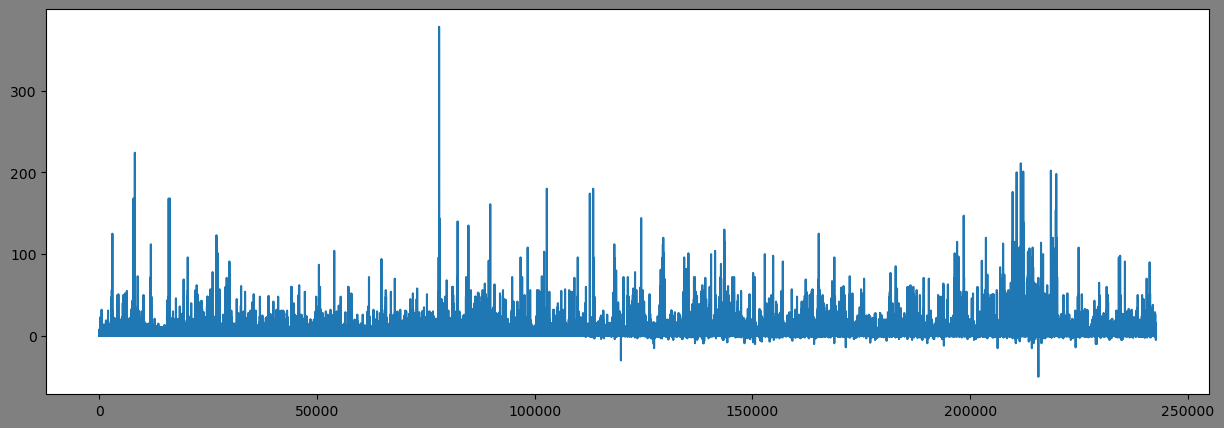

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5), facecolor="gray")
plt.plot(df1["Sales_Quantity"])  # Update the column name without the leading tab character

plt.show()

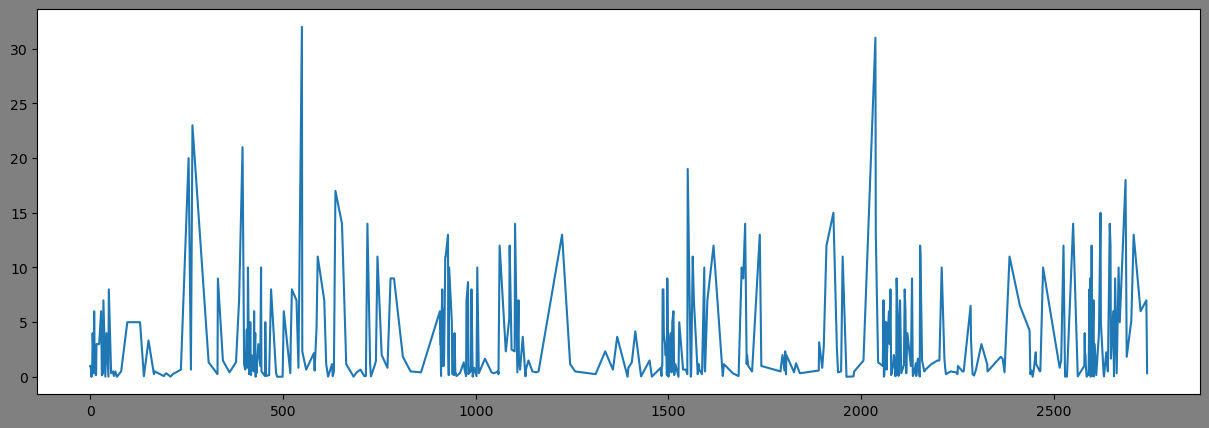

In [27]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
subset_size = int(len(df) * 0.01)  # Calculate the size of the subset (30% of the data)
subset = df1.head(subset_size)  # Select the first 1% of the data

plt.figure(figsize=(15, 5), facecolor="gray")
plt.plot(subset["Sales_Quantity"])  # Plot the subset of the "Sales_Quantity" column

plt.show()

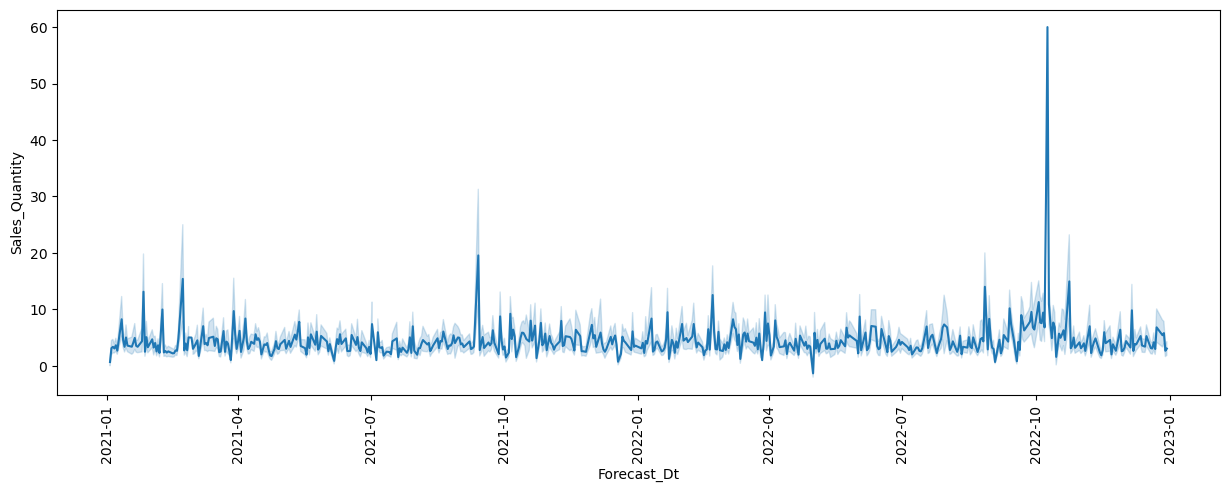

In [28]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.lineplot(data=df1, x="Forecast_Dt", y="Sales_Quantity")
plt.xticks(rotation=90)

plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def adfuller_test(x):
    x_values = x.astype(np.int64) // 10**9  # Convert to seconds since the epoch
    result = adfuller(x_values)
    labels = ["ADF", "p_value", "Lags", "Number of observations used"]
    for value, label in zip(result, labels):
        print(f"{label}: {value}")

# Apply the function to your DataFrame column
adfuller_test(df1['Sales_Quantity'])



ADF: -21.923899861823923
p_value: 0.0
Lags: 52
Number of observations used: 42563


### Performing stepwise search to minimize aic values

In [36]:
from pmdarima.arima import auto_arima

# Extract the 'Sales_Quantity' column from the DataFrame and convert it to a 1D array
y = df1['Sales_Quantity'].values.ravel()

# Use auto_arima on the 1D array
stepwise_fit = auto_arima(y, trace=True, suppress_warnings=True)
stepwise_fit.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=316814.671, Time=31.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=344767.042, Time=1.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=333079.752, Time=3.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=316824.238, Time=15.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344765.042, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=316824.145, Time=19.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=316812.882, Time=31.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=316810.883, Time=26.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=316810.867, Time=26.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=316812.840, Time=33.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=316814.357, Time=36.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=316808.867, Time=6.99 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=316822.238, Time=4.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=316809.635, Time=23.41 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                42616
Model:               SARIMAX(0, 1, 2)   Log Likelihood             -158401.433
Date:                Tue, 11 Jul 2023   AIC                         316808.867
Time:                        14:03:07   BIC                         316834.847
Sample:                             0   HQIC                        316817.066
                              - 42616                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9628      0.003   -334.562      0.000      -0.968      -0.957
ma.L2         -0.0197      0.003     -6.685      0.000      -0.025      -0.014
sigma2        99.1057      0.101    978.377      0.000      98.907      99.304
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          21953343.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             7.14
Prob(H) (two-sided):                  0.00   Kurtosis:                       113.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### split the data train and test

In [39]:
# Train and test set
train=df1[:42515]
test=df1[42515:]

### Bulid the model of TSA algorithms

In [41]:
train['Sales_Quantity'] = pd.to_numeric(train['Sales_Quantity'], errors='coerce')
from statsmodels.tsa.arima.model import ARIMA
# Create the ARIMA model
model = ARIMA(train['Sales_Quantity'], order=(2, 1, 2))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


C:\Users\Seenivasan\AppData\Local\Temp\ipykernel_18004\45199804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sales_Quantity'] = pd.to_numeric(train['Sales_Quantity'], errors='coerce')
C:\Users\Seenivasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Seenivasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Seenivasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and

                               SARIMAX Results                                
Dep. Variable:         Sales_Quantity   No. Observations:                42515
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -158060.063
Date:                Tue, 11 Jul 2023   AIC                         316130.125
Time:                        14:12:01   BIC                         316173.413
Sample:                             0   HQIC                        316143.788
                              - 42515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8775      0.236     -3.716      0.000      -1.340      -0.415
ar.L2          0.0170      0.007      2.447      0.014       0.003       0.031
ma.L1         -0.0853      0.237     -0.361      0.7

In [43]:
# Retrieve the estimated model parameters
params = model_fit.params

# Make predictions using the updated start and end arguments
pred = model_fit.predict(start=start, end=end, params=params, typ='levels')
print(pred)


42515    4.095876
42516    4.193399
42517    4.157620
42518    4.190672
42519    4.161062
           ...   
42611    4.175058
42612    4.175059
42613    4.175058
42614    4.175059
42615    4.175058
Name: predicted_mean, Length: 101, dtype: float64


C:\Users\Seenivasan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Evaluation Metrics 

In [60]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
# Convert datetime values in test array to numeric values
test_numeric = pd.to_numeric(test['Forecast_Dt'])

# Calculate the metrics
mae = mean_absolute_error(test_numeric, pred)
mse = mean_squared_error(test_numeric, pred)
rmse = mean_squared_error(test_numeric, pred, squared=False)
mape = mean_absolute_percentage_error(test_numeric,pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("RMPE:", mape)

MAE: 1.672341291089109e+18
MSE: 2.7967253950670827e+36
RMSE: 1.6723412914435507e+18
RMPE: 1.0


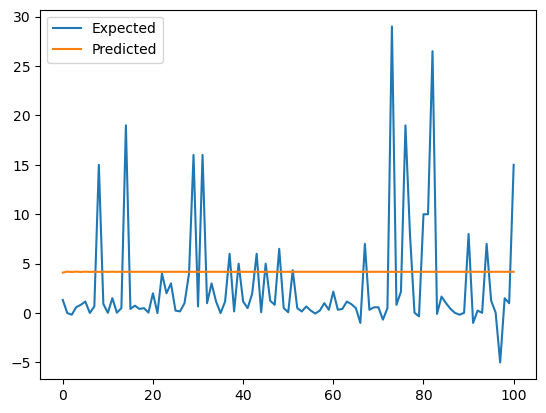

In [61]:
plt.plot(np.array(test['Sales_Quantity']),label="Expected")
plt.plot(np.array(pred),label="Predicted")
plt.legend();